In [1]:
#pandas library is imported to handle files, tabes
#pd denotes pandas where we use in this module in place of pandas
import pandas as pd

In [7]:
#reads dataset using pandas function
dataset = pd.read_csv("insurance_pre.csv")

In [3]:
dataset

,Age,Sex,BMI,Children,Smoker,Charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [8]:
#Due to Nominal data present in dataset, Use get_dummies to split (One hot encoding)
#drop_first is used to eliminate 1st column of state as the result will be same even it is dropped and memory consuming is less
dataset = pd.get_dummies(dataset,dtype=int, drop_first = True)
#shows the input dataset
dataset

,Age,BMI,Children,Charges,Sex_male,Smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [9]:
#spliting input and output as independent and dependent
independent=dataset[['Age', 'BMI', 'Children', 'Sex_male', 'Smoker_yes']]
dependent=dataset[['Charges']]

In [10]:
#Spliting training set and test set using sklearn
from sklearn.model_selection import train_test_split
#X - Input , Y - output
X_Train, X_Test, Y_Train, Y_Test = train_test_split(independent, dependent, test_size = 0.30, random_state=0)

In [111]:
#Using Decision tree regressor algorithm function from sklearn

from sklearn.tree import DecisionTreeRegressor
Regressor = DecisionTreeRegressor(criterion='poisson', splitter='random',max_features=None)
Regressor=Regressor.fit(X_Train,Y_Train)

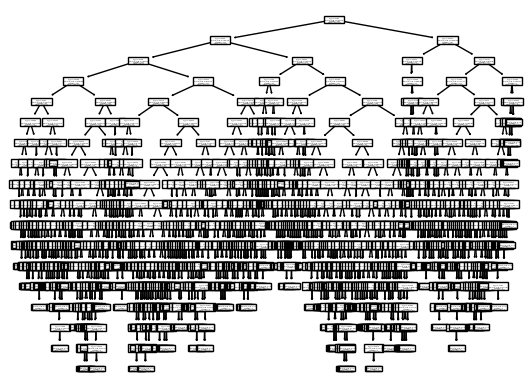

In [73]:
#using below code we can get the map
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(Regressor)
plt.show()

In [112]:
#to find predicted value from test data
Y_Pred = Regressor.predict(X_Test)

In [113]:
#Evaluate using R2 metrics
from sklearn.metrics import r2_score
#passing actual output of test and predict output to evaluate
R_Score = r2_score(Y_Test, Y_Pred)
#Check R_Score Value
R_Score
#if value near to 1 it is good model , near to 0 bad model

0.6665897904145714